### 1. Libraries needed

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline
pd.set_option('display.max_columns', None)
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OrdinalEncoder

### 2. Defining dataframe to work with

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')

### 3. Dataframe's main features - EDA

In [3]:
customer_df.head(10)

Customer       State  Customer Lifetime Value Response  Coverage Education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   
5  OC83172      Oregon              8256.297800      Yes     Basic  Bachelor   
6  XZ87318      Oregon              5380.898636      Yes     Basic   College   
7  CF85061     Arizona              7216.100311       No   Premium    Master   
8  DY87989      Oregon             24127.504020      Yes     Basic  Bachelor   
9  BQ94931      Oregon              7388.178085       No  Extended   College   

  Effective To Date EmploymentStatus Gender  Income Location Code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   
5           1/25/11         Employed      F   62902         Rural   
6           2/24/11         Employed      F   55350      Suburban   
7           1/18/11       Unemployed      M       0         Urban   
8           1/26/11    Medical Leave      M   14072      Suburban   
9           2/17/11         Employed      F   28812         Urban   

  Marital Status  Monthly Premium Auto  Months Since Last Claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   
5        Married                    69                       14   
6        Married                    67                        0   
7         Single                   101                        0   
8       Divorced                    71                       13   
9        Married                    93                       17   

   Months Since Policy Inception  Number of Open Complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   
5                             94                          0   
6                             13                          0   
7                             68                          0   
8                              3                          0   
9                              7                          0   

   Number of Policies     Policy Type        Policy Renew Offer Type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   
5                   2   Personal Auto   Personal L3           Offer2   
6                   9  Corporate Auto  Corporate L3           Offer1   
7                   4  Corporate Auto  Corporate L3           Offer1   
8                   2  Corporate Auto  Corporate L3           Offer1   
9                   8    Special Auto    Special L2           Offer2   

  Sales Channel  Total Claim Amount  Vehicle Class Vehicle Size  
0         Agent          384.811147   Two-Door Car      Medsize  
1   

In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

#### *The dataframe consists of categorical and numerical variables and is organised in 9134 rows and 24 columns. The feature Effective to Date contains datetime elements, that are falsely considered strings and will therefore have to be changed to datetime type. There are no NaNs in any of the columns of the dataframe.*

In [6]:
### creating an EDA report using the tool Laz presented

eda_report = ProfileReport(customer_df, title = "MCVA report") # where MCVA = marketing customer value analysis
eda_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### *There are 3 continuous variables*
 - **Customer Lifetime Value**: mean = 8004.9, median = 5780.2, std = 6871
 - **Income**                 : mean = 37380, median = 33889.5, std = 30380 ---- as expected highly correlated with employment status (0.64)
 - **Total Claim Amount**     : mean = 434.1, median = 383.1, std = 290.5

#### *Policy and Policy Type are very highly correlated variables, raising concenrs for multicollinearity if we were to use them for model training*

### 4. Renaming the columns

In [7]:
cols = [col_name.lower().replace(' ', '_') for col_name in customer_df.columns]
customer_df.columns = cols
customer_df.head()

customer       state  customer_lifetime_value response  coverage education  \
0  BU79786  Washington              2763.519279       No     Basic  Bachelor   
1  QZ44356     Arizona              6979.535903       No  Extended  Bachelor   
2  AI49188      Nevada             12887.431650       No   Premium  Bachelor   
3  WW63253  California              7645.861827       No     Basic  Bachelor   
4  HB64268  Washington              2813.692575       No     Basic  Bachelor   

  effective_to_date employmentstatus gender  income location_code  \
0           2/24/11         Employed      F   56274      Suburban   
1           1/31/11       Unemployed      F       0      Suburban   
2           2/19/11         Employed      F   48767      Suburban   
3           1/20/11       Unemployed      M       0      Suburban   
4            2/3/11         Employed      M   43836         Rural   

  marital_status  monthly_premium_auto  months_since_last_claim  \
0        Married                    69                       32   
1         Single                    94                       13   
2        Married                   108                       18   
3        Married                   106                       18   
4         Single                    73                       12   

   months_since_policy_inception  number_of_open_complaints  \
0                              5                          0   
1                             42                          0   
2                             38                          0   
3                             65                          0   
4                             44                          0   

   number_of_policies     policy_type        policy renew_offer_type  \
0                   1  Corporate Auto  Corporate L3           Offer1   
1                   8   Personal Auto   Personal L3           Offer3   
2                   2   Personal Auto   Personal L3           Offer1   
3                   7  Corporate Auto  Corporate L2           Offer1   
4                   1   Personal Auto   Personal L1           Offer1   

  sales_channel  total_claim_amount  vehicle_class vehicle_size  
0         Agent          384.811147   Two-Door Car      Medsize  
1         Agent         1131.464935  Four-Door Car      Medsize  
2         Agent          566.472247   Two-Door Car      Medsize  
3   Call Center          529.881344            SUV      Medsize  
4         Agent          138.130879  Four-Door Car      Medsize

### 5. Fixing datatypes
- One column (effective_to_date) needs fixing
- 2 features (gender and response) will be turned to boolean (dummies with 0 or 1 as a value and datatype int) as this is what they represent

In [8]:
customer_df['effective_to_date'] = customer_df['effective_to_date'].str.replace('/', '')
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'].astype(str), format = '%m%d%y')

#### **Before making any changes to categorical variables, they should be saved in a separate dataframe, so they can be used for task 8**

In [9]:
cat = customer_df.select_dtypes(include = np.object)

In [10]:
def change_gender(x):
    if x == 'M':
        return 0
    elif x == 'F':
        return 1

customer_df['gender'] = list(map(change_gender, customer_df['gender']))
customer_df['gender'] = customer_df['gender'].apply(lambda x : int(x))

In [11]:
def change_resp(x):
    if x == 'Yes':
        return 0
    elif x == 'No':
        return 1

customer_df['response'] = list(map(change_resp, customer_df['response']))
customer_df['response'] = customer_df['response'].apply(lambda x : int(x))

In [12]:
customer_df.state.unique()

array(['Washington', 'Arizona', 'Nevada', 'California', 'Oregon'],
      dtype=object)

#### - Other categorical variables (or numerical that can be considered categorical) that can be turned to numerical with dummy values: state, coverage, education, employment_status, location code, marital_status, number_of_complaints, number_of_policies, policy_type, policy, sales_channel, vehicle_class, vehicle_size

#### *First, the number of categories will be reduced where it can be reduced and then the new categories will be geiven dummy values*

In [13]:
# grouping states based on their broader geografical region

def change_state(x):
    if x == 'Washington':
        return 'nw'
    elif x == 'Oregon':
        return 'nw'
    elif x == 'Arizona':
        return 'sw'
    elif  x == 'California':
        return 'sw'
    else:
        return 'sw'

customer_df['state'] = list(map(change_state, customer_df['state']))

# assigning dummy values
customer_df = pd.get_dummies(customer_df, columns=['state'], drop_first=True)

In [14]:
# coverage has 3 values: dummy values can be assigned directly

customer_df = pd.get_dummies(customer_df, columns=['coverage'], drop_first=True)

In [15]:
# education: I will group the values as above highschool = ah or highschool or below = hb

def change_edu(x):
    if x == 'Bachelor':
        return 'ah'
    elif x == 'College':
        return 'ah'
    elif x == 'Master':
        return 'ah'
    elif  x == 'Doctor':
        return 'ah'
    else:
        return 'bh'

customer_df['education'] = list(map(change_edu, customer_df['education']))
customer_df = pd.get_dummies(customer_df, columns=['education'], drop_first=True)

In [16]:
# employmentstatus: Employed and Medical leave will be one group and the rest will be a second one
# since there are only 2 categories, they can already be turned into dummy boolean values

def change_emp(x):
    if x == 'Employed':
        return 1
    elif x == 'Unemployed':
        return 0
    elif x == 'Medical Leave':
        return 1
    elif  x == 'Disabled':
        return 0
    else:
        return 0

customer_df['employmentstatus'] = list(map(change_emp, customer_df['employmentstatus']))
customer_df = pd.get_dummies(customer_df, columns=['employmentstatus'], drop_first=True)

In [17]:
# location_code, marital_status: directly assign dummies

customer_df = pd.get_dummies(customer_df, columns=['location_code'], drop_first=True)
customer_df = pd.get_dummies(customer_df, columns=['marital_status'], drop_first=True)

In [18]:
customer_df.number_of_open_complaints.value_counts()

# 2 cases: existence of complaints or not

0    7252
1    1011
2     374
3     292
4     149
5      56
Name: number_of_open_complaints, dtype: int64

In [19]:
def change_complaints(x):
    if x > 0:
        return 1
    else:
        return 0

customer_df['number_of_open_complaints'] = list(map(change_complaints, customer_df['number_of_open_complaints']))

In [20]:
customer_df.number_of_policies.value_counts()

# 3 categories: 1-3, 4-6, 7-9, then dummify

1    3251
2    2294
3    1168
7     433
9     416
4     409
5     407
8     384
6     372
Name: number_of_policies, dtype: int64

In [21]:
def change_npol(x):
    if x <=3:
        return 1
    elif x <= 6 and x > 3:
        return 2
    else:
        return 3
    
customer_df['number_of_policies'] = list(map(change_npol, customer_df['number_of_policies']))

In [22]:
# policy and policy_type are highly correlated and the existence of both in the set after reducing their category to 3 is redundant, as has been proven in previous labs
customer_df = customer_df.drop('policy_type', axis = 1)

# policy: decrease number of categories to 3

def change_pol(x):
    if x == 'Corporate L1' or x == 'Corporate L2' or x == 'Corporate L3':
        return 'corp'
    elif  x == 'Personal L1' or x == 'Personal L2' or x == 'Personal L3':
        return 'pers'
    else:
        return 'sp'

customer_df['policy'] = list(map(change_emp, customer_df['policy']))
customer_df = pd.get_dummies(customer_df, columns=['policy'], drop_first=True)

In [23]:
customer_df.renew_offer_type.unique()

# ordinal (label) encoding seems to be the only reasonable choice in this case

array(['Offer1', 'Offer3', 'Offer2', 'Offer4'], dtype=object)

In [24]:
encoder = OrdinalEncoder()
customer_df['renew_offer_type'] = encoder.fit_transform(customer_df[['renew_offer_type']])

In [25]:
# sales_channel: reduce categories to 3, then dummify

def change_sc(x):
    if x == 'Agent':
        return 'rep'
    elif x == 'Call Center':
        return 'rep'
    elif x == 'Web':
        return 'web'
    else:
        return 'br'

customer_df['sales_channel'] = list(map(change_sc, customer_df['sales_channel']))
customer_df = pd.get_dummies(customer_df, columns=['sales_channel'], drop_first=True)

In [26]:
# vehicle_class: same as above

def change_vc(x):
    if x == 'Two-Door Car' or x == 'Four-Door Car':
        return 'simple'
    elif x == 'SUV' or x == 'Sports Car':
        return 'special'
    else:
        return 'luxury'

customer_df['vehicle_class'] = list(map(change_vc, customer_df['vehicle_class']))
customer_df = pd.get_dummies(customer_df, columns=['vehicle_class'], drop_first=True)

In [27]:
# vehicle_size: dummify

customer_df = pd.get_dummies(customer_df, columns=['vehicle_size'], drop_first=True)

### 5. Plotting correlation matrix

In [28]:
nums_corr = round(customer_df.corr(), 2)
nums_corr

customer_lifetime_value  response  gender  \
customer_lifetime_value                           1.00      0.01    0.01   
response                                          0.01      1.00    0.00   
gender                                            0.01      0.00    1.00   
income                                            0.02     -0.01    0.02   
monthly_premium_auto                              0.40     -0.01   -0.00   
months_since_last_claim                           0.01      0.02   -0.03   
months_since_policy_inception                     0.01     -0.00   -0.00   
number_of_open_complaints                        -0.02      0.02    0.01   
number_of_policies                               -0.07      0.01   -0.01   
renew_offer_type                                 -0.07      0.16   -0.05   
total_claim_amount                                0.23     -0.02   -0.07   
state_sw                                         -0.01     -0.00   -0.01   
coverage_Extended                                 0.07      0.00    0.02   
coverage_Premium                                  0.13     -0.00    0.00   
education_bh                                      0.03      0.02   -0.01   
employmentstatus_1                                0.04      0.03    0.01   
location_code_Suburban                           -0.00     -0.12   -0.09   
location_code_Urban                               0.00      0.07    0.05   
marital_status_Married                            0.01      0.04    0.03   
marital_status_Single                            -0.03      0.05   -0.04   
sales_channel_rep                                 0.00     -0.07   -0.01   
sales_channel_web                                -0.01      0.03    0.02   
vehicle_class_simple                             -0.31      0.03    0.01   
vehicle_class_special                             0.21     -0.04    0.00   
vehicle_size_Medsize                              0.01     -0.02   -0.02   
vehicle_size_Small                                0.01      0.04    0.01   

                               income  monthly_premium_auto  \
customer_lifetime_value          0.02                  0.40   
response                        -0.01                 -0.01   
gender                           0.02                 -0.00   
income                           1.00                 -0.02   
monthly_premium_auto            -0.02                  1.00   
months_since_last_claim         -0.03                  0.01   
months_since_policy_inception   -0.00                  0.02   
number_of_open_complaints        0.01                 -0.01   
number_of_policies              -0.02                 -0.00   
renew_offer_type                 0.14                 -0.07   
total_claim_amount              -0.36                  0.63   
state_sw                        -0.00                 -0.00   
coverage_Extended               -0.03                  0.20   
coverage_Premium                 0.01                  0.37   
education_bh                    -0.04                  0.03   
employmentstatus_1               0.76                 -0.01   
location_code_Suburban          -0.45                  0.08   
location_code_Urban              0.27                 -0.05   
marital_status_Married           0.24                 -0.01   
marital_status_Single           -0.30                  0.01   
sales_channel_rep               -0.00                  0.00   
sales_channel_web                0.01                 -0.00   
vehicle_class_simple             0.03                 -0.73   
vehicle_class_special           -0.03                  0.46   
vehicle_size_Medsize             0.02                  0.01   
vehicle_size_Small              -0.00                 -0.00   

                               months_since_last_claim  \
customer_lifetime_value                           0.01   
response                                          0.02   
gender                                           -0.03   
income                                      

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5]),
 [Text(0.5, 0, 'customer_lifetime_value'),
  Text(1.5, 0, 'response'),
  Text(2.5, 0, 'gender'),
  Text(3.5, 0, 'income'),
  Text(4.5, 0, 'monthly_premium_auto'),
  Text(5.5, 0, 'months_since_last_claim'),
  Text(6.5, 0, 'months_since_policy_inception'),
  Text(7.5, 0, 'number_of_open_complaints'),
  Text(8.5, 0, 'number_of_policies'),
  Text(9.5, 0, 'renew_offer_type'),
  Text(10.5, 0, 'total_claim_amount'),
  Text(11.5, 0, 'state_sw'),
  Text(12.5, 0, 'coverage_Extended'),
  Text(13.5, 0, 'coverage_Premium'),
  Text(14.5, 0, 'education_bh'),
  Text(15.5, 0, 'employmentstatus_1'),
  Text(16.5, 0, 'location_code_Suburban'),
  Text(17.5, 0, 'location_code_Urban'),
  Text(18.5, 0, 'marital_status_Married'),
  Text(19.5, 0, 'marital_status_Single'),
  Text(20.5, 0, 'sales_channel_rep'),
  Text(21.5, 0, 'sales_

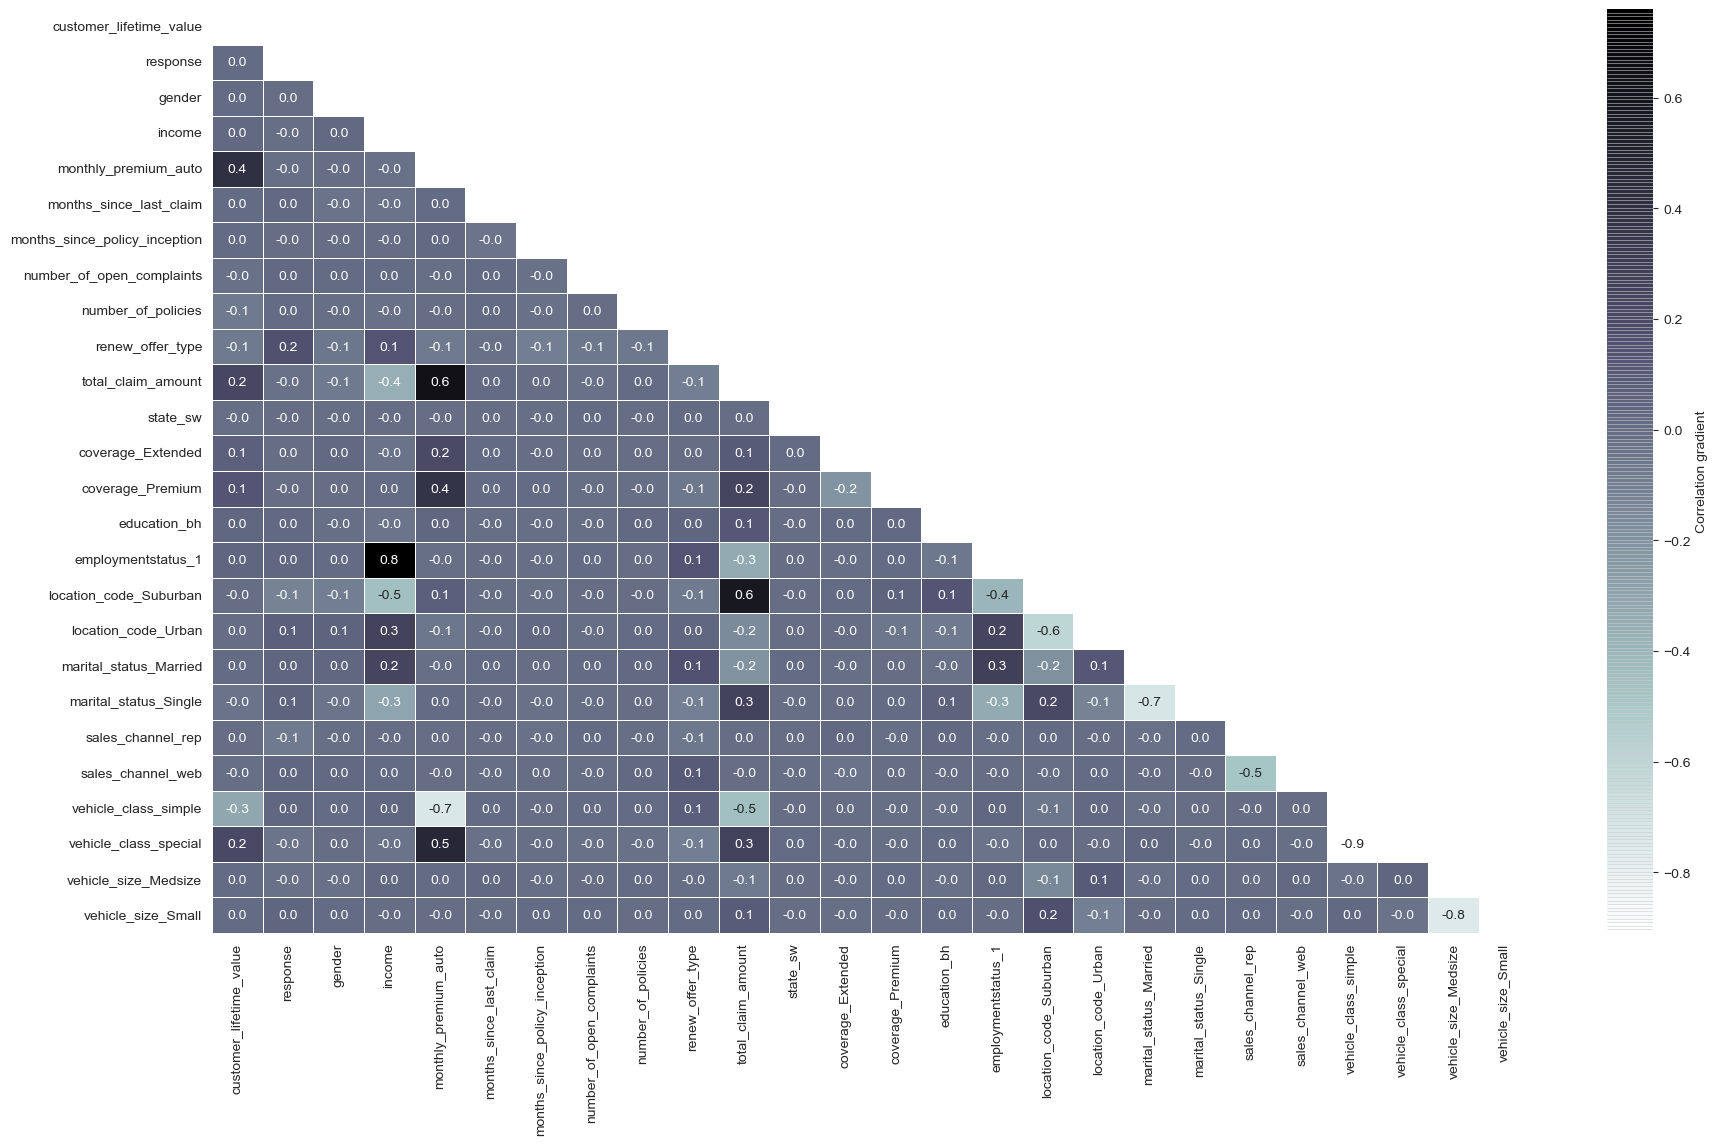

In [29]:
mask = np.zeros_like(nums_corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (20, 12))
cm = sns.heatmap(nums_corr, mask = mask, annot=True, fmt = '.1f', linewidth = .5, cmap = 'bone_r', cbar_kws = {'label': 'Correlation gradient', 'orientation' : 'vertical', 'location' : 'right', 'fraction' : .1, 'drawedges': True}) # cbar_kws arguments --> adaptation inspired by SEJAL KSHIRSAGAR's Customize Seaborn Heatmaps on kaggle. orientation and location are in their default state. ### mask is inactive and only mentioned for the sake of practise
#cm.xaxis.tick_top()
plt.xticks(rotation = 90)


- *The highest positive correlation among numerical variables is observed in the case of employmentstatus_1 (employed) and income (0.8), which is as it would be expected.*
- *The highest negative correlation is observed between vehicle_class_special and vehicle_class_simple (-0.9). The degree of correlation in this case means that one of the 2 columns will need to be dropped, so as to avoid multicollinearity.*
- *This insidence aside, the highest negative correlation is observed between marital_status_Married and marital_status_Single (-0.7).*
- *Most pairs of variables' degree of correlation is very low, its absolute value being < 0.1*

In [30]:
# the variable with the correlation with the target variable (up to this point it was total_claim_amount when using this dataset) will be dropped

customer_df = customer_df.drop('vehicle_class_special', axis = 1)

### 7. Plotting continuous variables

- As already mentioned above, there are 3 continuous variables: customer lifetime value, income and total claim amount.

[Text(0.5, 0, 'Total claim amount ($)'), Text(0, 0.5, 'N customers')]

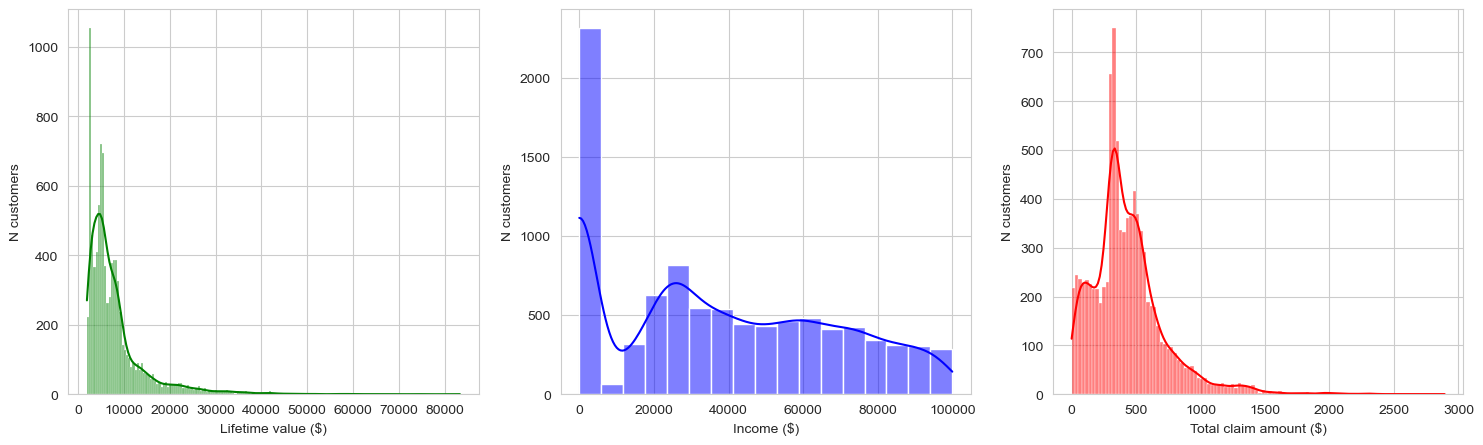

In [31]:
plt.rcParams['figure.figsize'] = [18,5]
fig, axes = plt.subplots(1,3)

sns.histplot(data = customer_df['customer_lifetime_value'], kde = True, color = 'green', ax = axes[0]).set(xlabel = 'Lifetime value ($)', ylabel = 'N customers')
sns.histplot(customer_df['income'], kde = True, color = 'blue', ax = axes[1]).set(xlabel = 'Income ($)', ylabel = 'N customers')
sns.histplot(customer_df['total_claim_amount'], kde = True, color = 'red', ax = axes[2]).set(xlabel = 'Total claim amount ($)', ylabel = 'N customers')

- *The distribution of all continuous variables is skewed to the right.*
- *Lifetime value and total claim amount appear -in terms of distribution- closer to normality than Income.*
- *Lifetime value's most frequent values are close to the minimum (around 1000 instances).*
- *For total claim amount they appear to be close to 400$ (around 750 instances).*
- *Income's most frequent value on the other hand is 0 (around 2500 instances), while the rest of its values are overall and compared to the other 2 variables more equally distributed along axis x.*

### 8. Plotting categorical variables

In [32]:
cat = cat.drop('customer', axis = 1)

*Customer is a categorical variable where every value is distinct and thus a separate category. It doesn't make sense to plot it.*

In [33]:
len(cat.columns)    # to decide how many subplots will be needed and the kind of arrangement that fits them best

14

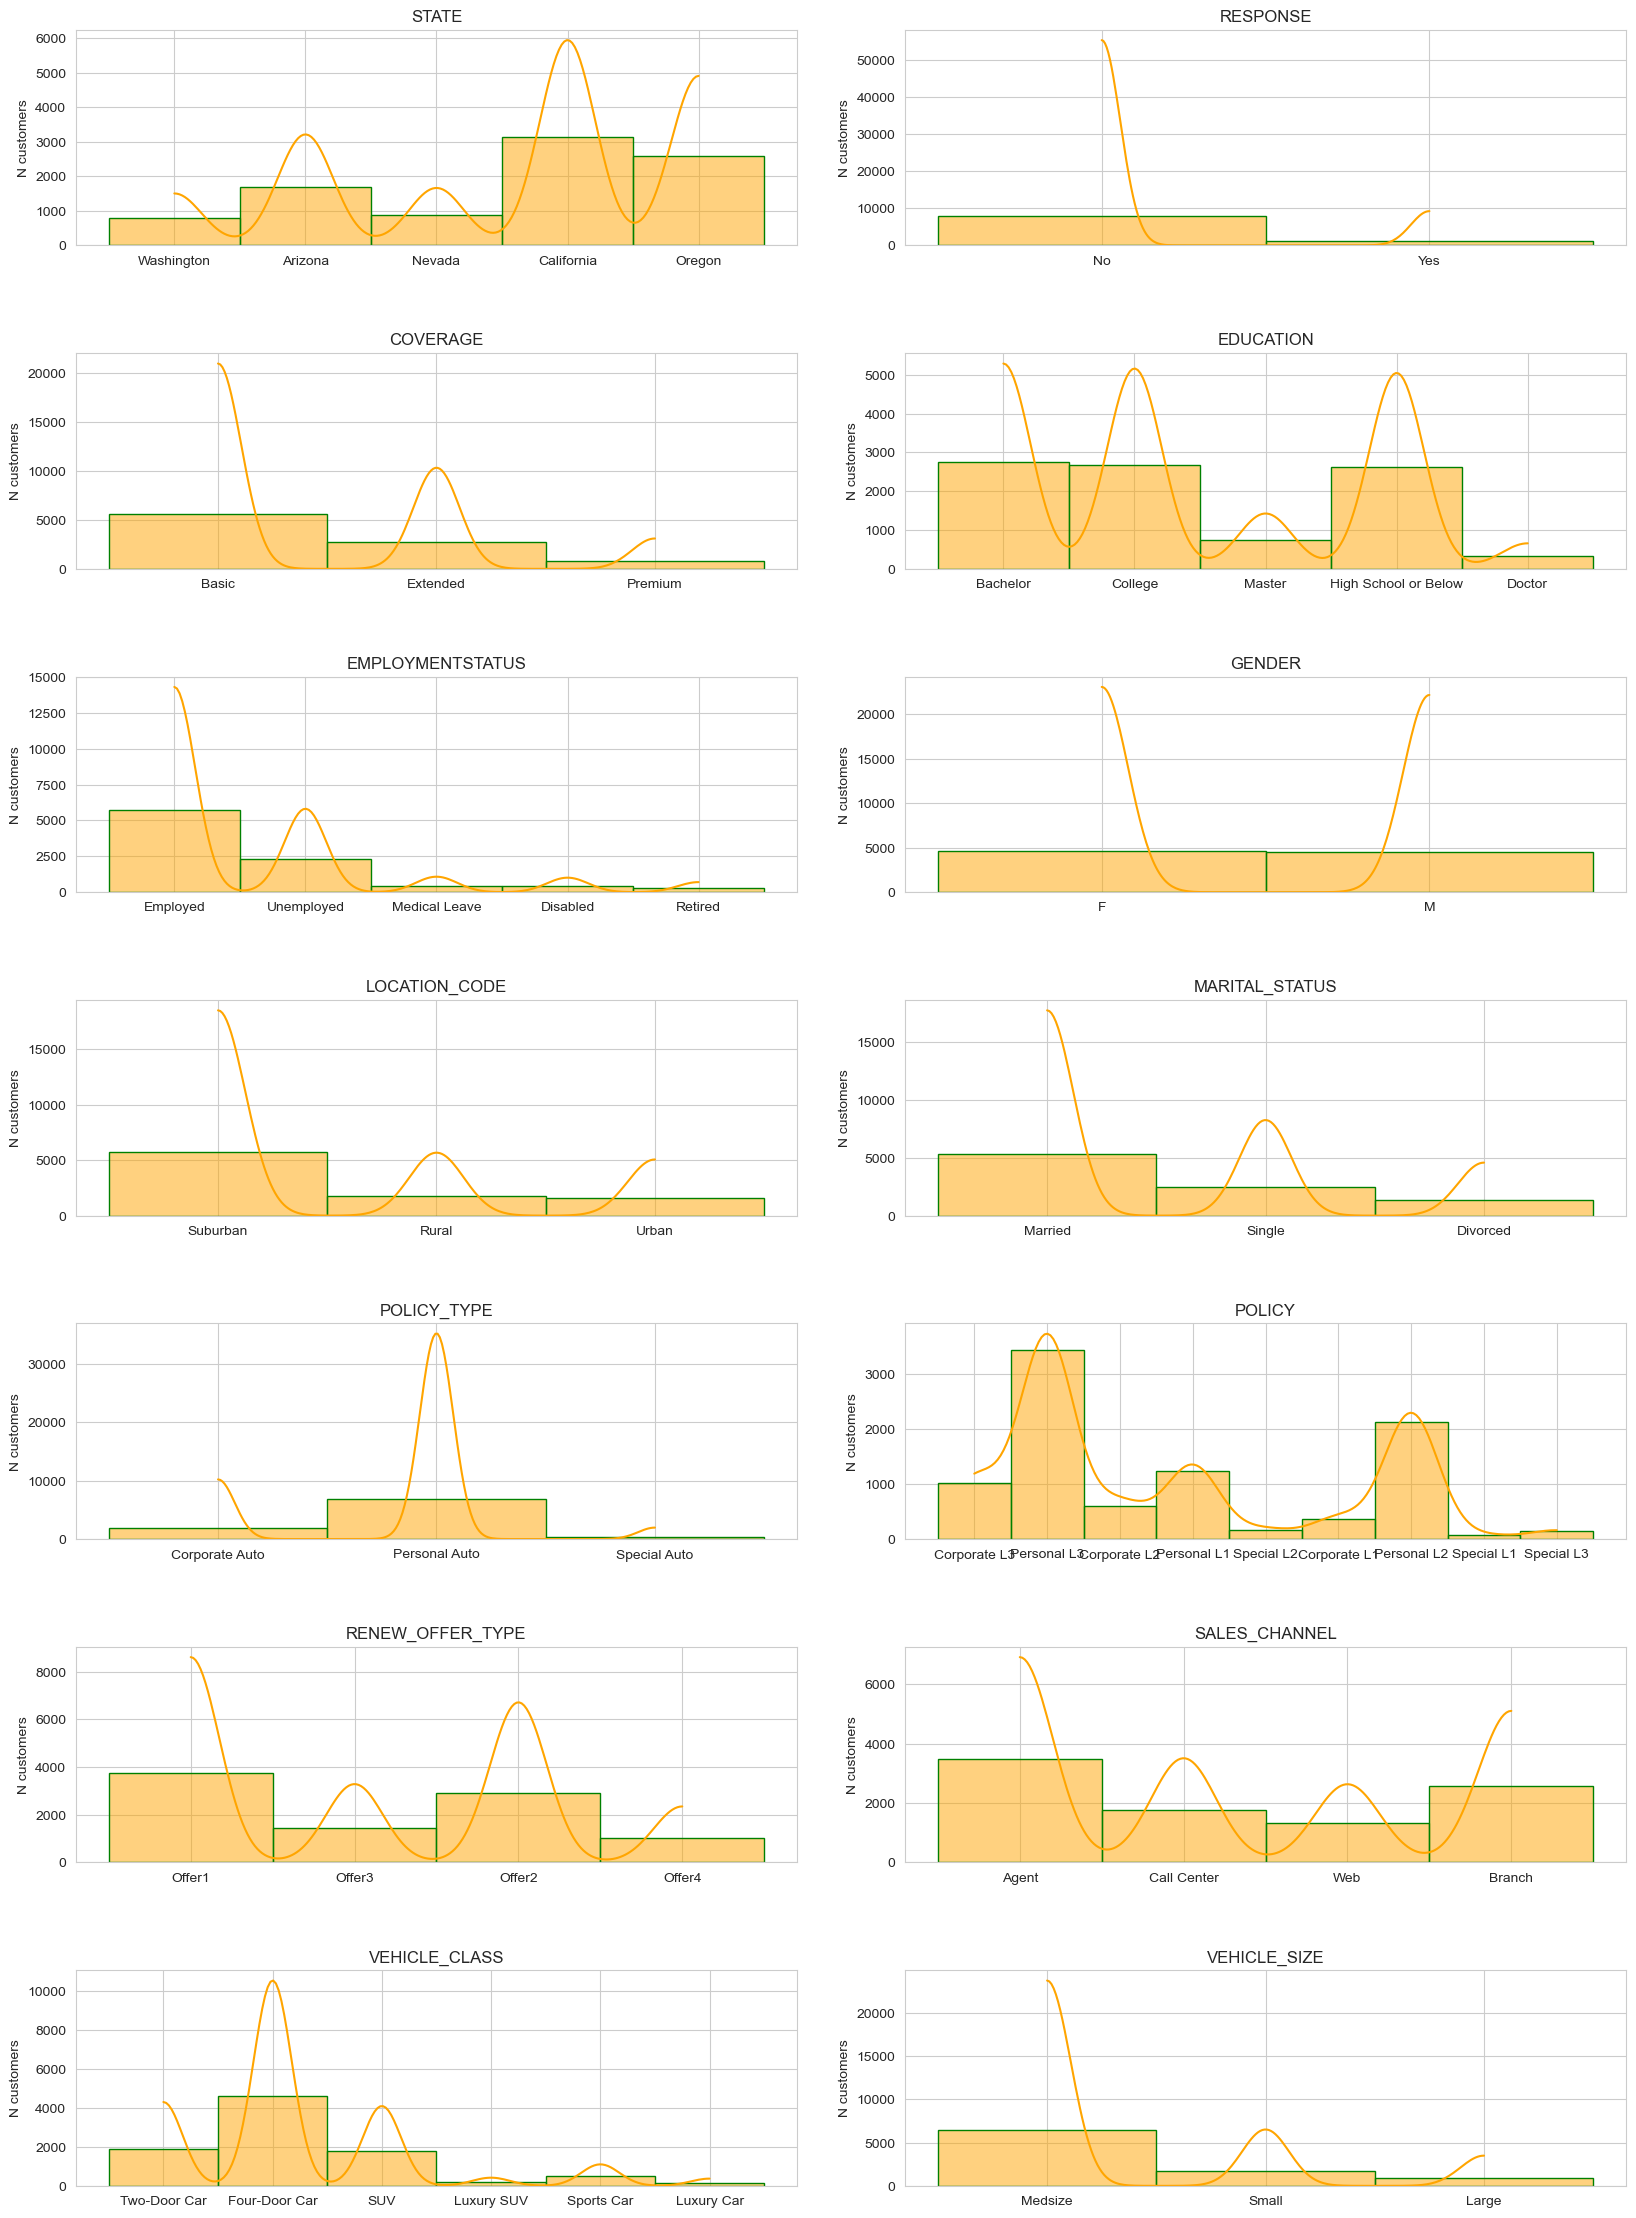

In [34]:
fig, axes = plt.subplots(7,2, figsize = (20,28))
plt.subplots_adjust(wspace = 0.15, hspace=0.5)
#plt.suptitle("Categorical Variables")

for col, ax in zip(cat.columns, axes.flat):
    sns.histplot(cat[col], discrete = True, color = 'orange', edgecolor = 'green', kde = True, ax = ax).set(xlabel = '', ylabel = 'N customers', title = col.upper())
plt.show()


### 9. Finding outliers in continuous data

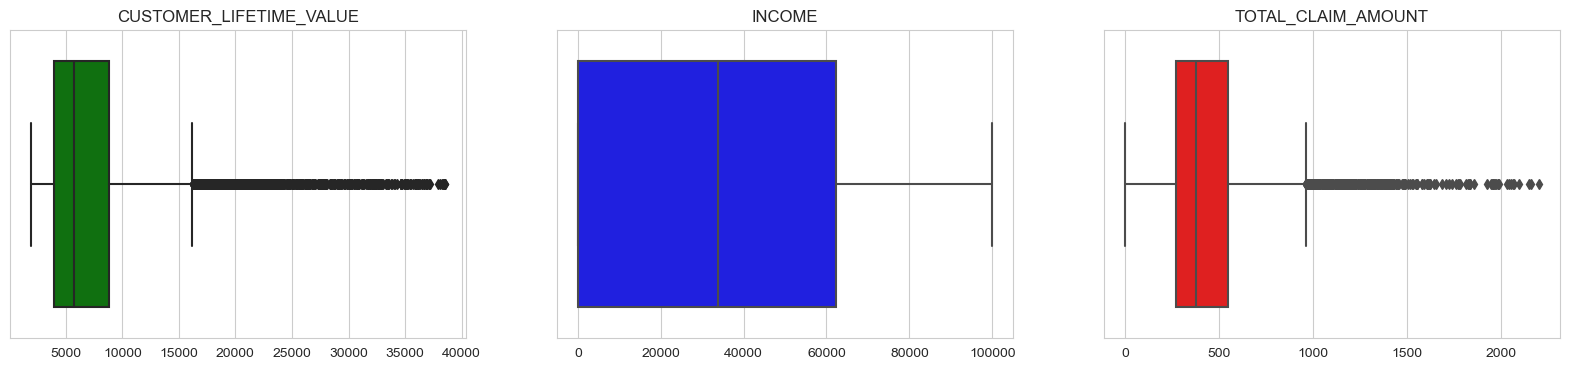

In [44]:
fig, axes = plt.subplots(1,3, figsize = (20,4))
plt.subplots_adjust(hspace=0.5)
#plt.suptitle("Categorical Variables")

num1 = customer_df[['customer_lifetime_value', 'income', 'total_claim_amount']] # a dataframe to use with the loop that follows to plot boxplots of the continuous variables
color = ['green', 'blue', 'red']
i = 0

for col, ax in zip(num1.columns, axes.flat):
    sns.boxplot(num1[col], color = color[i], ax = ax).set(xlabel = '', title = col.upper())
    i += 1
plt.show()

### *customer_lifetime_value and total_claim_amount have a lot of outliers, whereas income has none. The right whiskers for the first 2 variables will have to be found and then the outliers carefully removed in a way that not too much data gets lost in the process.*

In [36]:
# a function to quickly apply the removal of outliers to the entire dataframe of choice

def outlier_splicer_3(df, column, whis):
    iqr = np.percentile(df[column],75) - np.percentile(df[column],25)
    upper_limit = np.percentile(df[column],75) + whis*iqr
    lower_limit = np.percentile(df[column],25) - whis*iqr
    df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
    return df

<AxesSubplot:xlabel='customer_lifetime_value'>

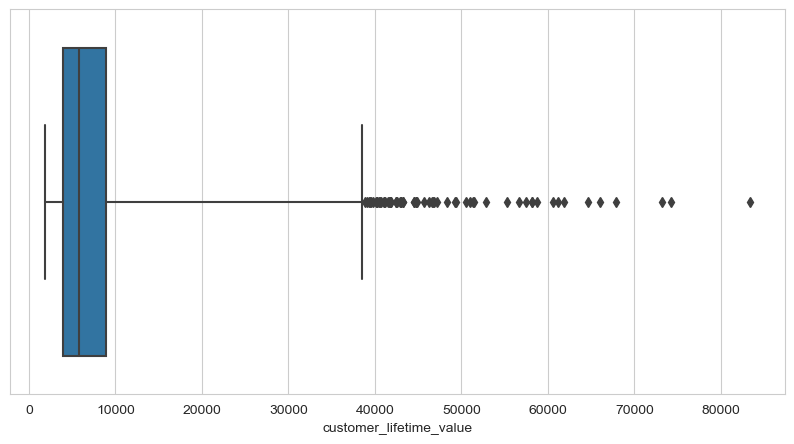

In [37]:
plt.rcParams['figure.figsize'] = [10,5]
sns.boxplot(customer_df['customer_lifetime_value'], whis = 6)   # experimenting with the whiskers of the plot

In [38]:
num1 = outlier_splicer_3(num1, 'customer_lifetime_value', 6)    # using the subframe num1 to experiment on instead of directly applying changes to the original dataframe
num1.shape

(9068, 3)

<AxesSubplot:xlabel='total_claim_amount'>

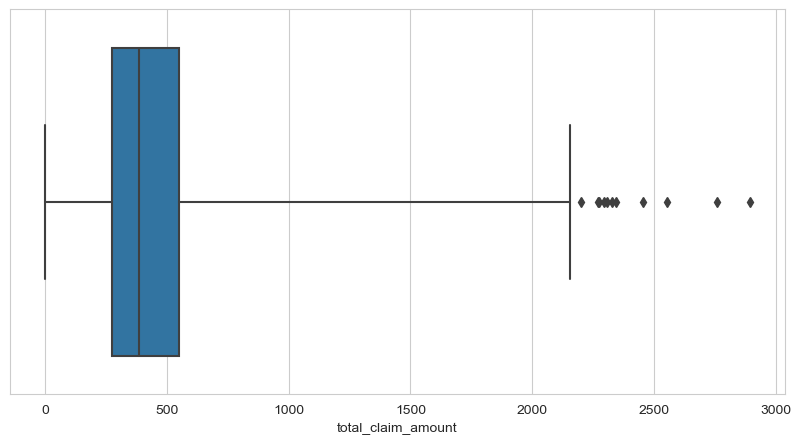

In [39]:
plt.rcParams['figure.figsize'] = [10,5]
sns.boxplot(customer_df['total_claim_amount'], whis = 6)

In [40]:
num1 = outlier_splicer_3(num1, 'total_claim_amount', 6)
num1.shape

(9060, 3)

In [41]:
print('Removed rows:', round(((len(customer_df) - len(num1))*100/len(customer_df)), 2), '%')

Removed rows: 0.81 %


- Since there is no particular plan on the use of the transformed dataframe, there is no need to challenge the percentage of data lost. Nevertheless and roughly speaking, 0.81% of data points lost is not a big amount. The changes will now be implemented to the original dataframe customer_df.
- The column effective_to_date would not be useful for the creation of any of the regression models that we have discussed up to this point and the same would be true about customer

In [42]:
customer_df = outlier_splicer_3(customer_df, 'customer_lifetime_value', 6)
customer_df = outlier_splicer_3(customer_df, 'total_claim_amount', 6)
customer_df = customer_df.drop(['customer', 'effective_to_date'], axis = 1)
customer_df

customer_lifetime_value  response  gender  income  monthly_premium_auto  \
0                 2763.519279         1       1   56274                    69   
1                 6979.535903         1       1       0                    94   
2                12887.431650         1       1   48767                   108   
3                 7645.861827         1       0       0                   106   
4                 2813.692575         1       0   43836                    73   
...                       ...       ...     ...     ...                   ...   
9129             23405.987980         1       0   71941                    73   
9130              3096.511217         0       1   21604                    79   
9131              8163.890428         1       0       0                    85   
9132              7524.442436         1       0   21941                    96   
9133              2611.836866         1       0       0                    77   

      months_since_last_claim  months_since_policy_inception  \
0                          32                              5   
1                          13                             42   
2                          18                             38   
3                          18                             65   
4                          12                             44   
...                       ...                            ...   
9129                       18                             89   
9130                       14                             28   
9131                        9                             37   
9132                       34                              3   
9133                        3                             90   

      number_of_open_complaints  number_of_policies  renew_offer_type  \
0                             0                   1               0.0   
1                             0                   3               2.0   
2                             0                   1               0.0   
3                             0                   3               0.0   
4                             0                   1               0.0   
...                         ...                 ...               ...   
9129                          0                   1               1.0   
9130                          0                   1               0.0   
9131                          1                   1               0.0   
9132                          0                   1               2.0   
9133                          0                   1               3.0   

      total_claim_amount  state_sw  coverage_Extended  coverage_Premium  \
0             384.811147         0                  0                 0   
1            1131.464935         1                  1                 0   
2             566.472247         1                  0                 1   
3             529.881344         1                  0                 0   
4             138.130879         0                  0                 0   
...                  ...       ...                ...               ...   
9129          198.234764         1                  0                 0   
9130          379.200000         1                  1                 0   
9131          790.784983         1                  1                 0   
9132          691.200000         1                  1                 0   
9133          369.600000         1                  1                 0   

      education_bh  employmentstatus_1  location_code_Suburban  \
0                0                   1                       1   
1                0                   0                       1   
2                0                   1                       1   
3                0                   0                       1   
4                0                   1                       0   
...            ...                 ...                     ...   
9129             0      

### **Finally, customer_df consists of 9060 rows and 25 columns and all categorical variables that could be useful have been turned to numericals with dummy values**

### 10. Checking for NaNs

In [43]:
customer_df.isna().sum()

customer_lifetime_value          0
response                         0
gender                           0
income                           0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
renew_offer_type                 0
total_claim_amount               0
state_sw                         0
coverage_Extended                0
coverage_Premium                 0
education_bh                     0
employmentstatus_1               0
location_code_Suburban           0
location_code_Urban              0
marital_status_Married           0
marital_status_Single            0
sales_channel_rep                0
sales_channel_web                0
vehicle_class_simple             0
vehicle_size_Medsize             0
vehicle_size_Small               0
dtype: int64

### The dataframe is clear of NaNs, so no further actions are required